**Regresion Lineal**

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import style
from sklearn.model_selection import cross_val_score

In [3]:
dato = pd.DataFrame(pd.read_csv('./Titanic1.csv'))

In [4]:
dato.shape

(891, 12)

In [5]:
dato.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
dato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
dato.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
dato.isnull().sum()*100/dato.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

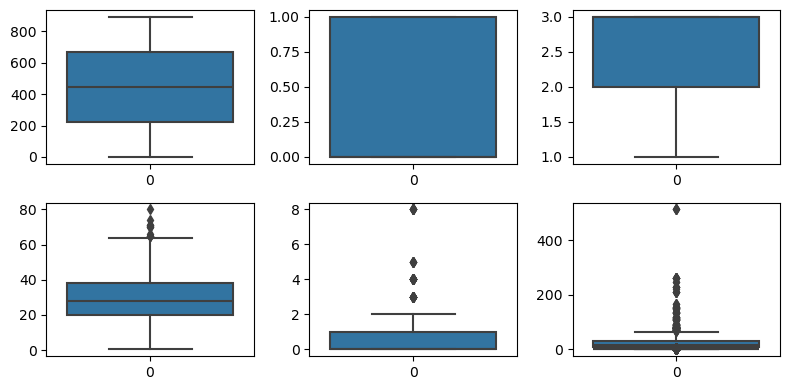

In [9]:
fig, axs = plt.subplots(2,3, figsize = (8,4))
plt1 = sns.boxplot(dato['PassengerId'], ax = axs[0,0])
plt2 = sns.boxplot(dato['Survived'], ax = axs[0,1])
plt3 = sns.boxplot(dato['Pclass'], ax = axs[0,2])
plt1 = sns.boxplot(dato['Age'], ax = axs[1,0])
plt2 = sns.boxplot(dato['SibSp'], ax = axs[1,1])
plt3 = sns.boxplot(dato['Parch'], ax = axs[1,2])
plt3 = sns.boxplot(dato['Fare'], ax = axs[1,2])
plt.tight_layout()


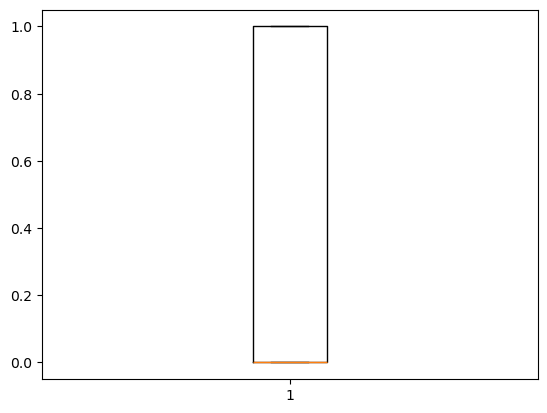

In [13]:
plt.boxplot(dato.Survived)
Q1 = dato.Survived.quantile(0.25)
Q3 = dato.Survived.quantile(0.75)
IQR = Q3 - Q1
dato = dato[(dato.Survived >= Q1 - 1.5*IQR) & (dato.Survived <= Q3 + 1.5*IQR)]

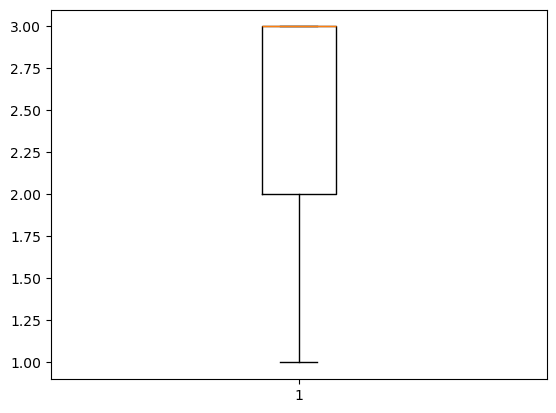

In [14]:
plt.boxplot(dato.Pclass)
Q1 = dato.Pclass.quantile(0.25)
Q3 = dato.Pclass.quantile(0.75)
IQR = Q3 - Q1
dato = dato[(dato.Pclass >= Q1 - 1.5*IQR) & (dato.Pclass <= Q3 + 1.5*IQR)]

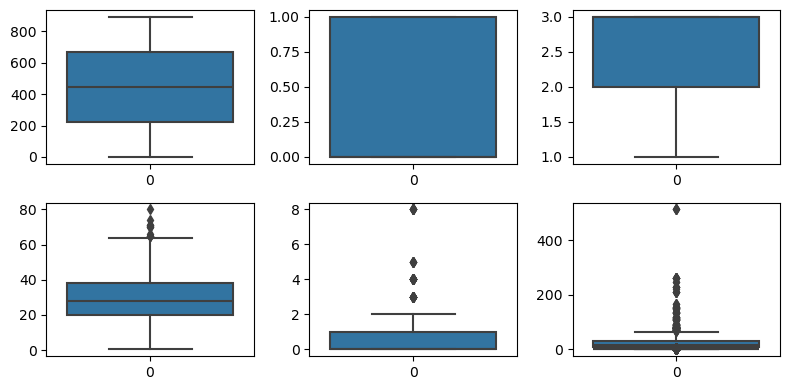

In [15]:
fig, axs = plt.subplots(2,3, figsize = (8,4))
plt1 = sns.boxplot(dato['PassengerId'], ax = axs[0,0])
plt2 = sns.boxplot(dato['Survived'], ax = axs[0,1])
plt3 = sns.boxplot(dato['Pclass'], ax = axs[0,2])
plt1 = sns.boxplot(dato['Age'], ax = axs[1,0])
plt2 = sns.boxplot(dato['SibSp'], ax = axs[1,1])
plt3 = sns.boxplot(dato['Parch'], ax = axs[1,2])
plt3 = sns.boxplot(dato['Fare'], ax = axs[1,2])
plt.tight_layout()

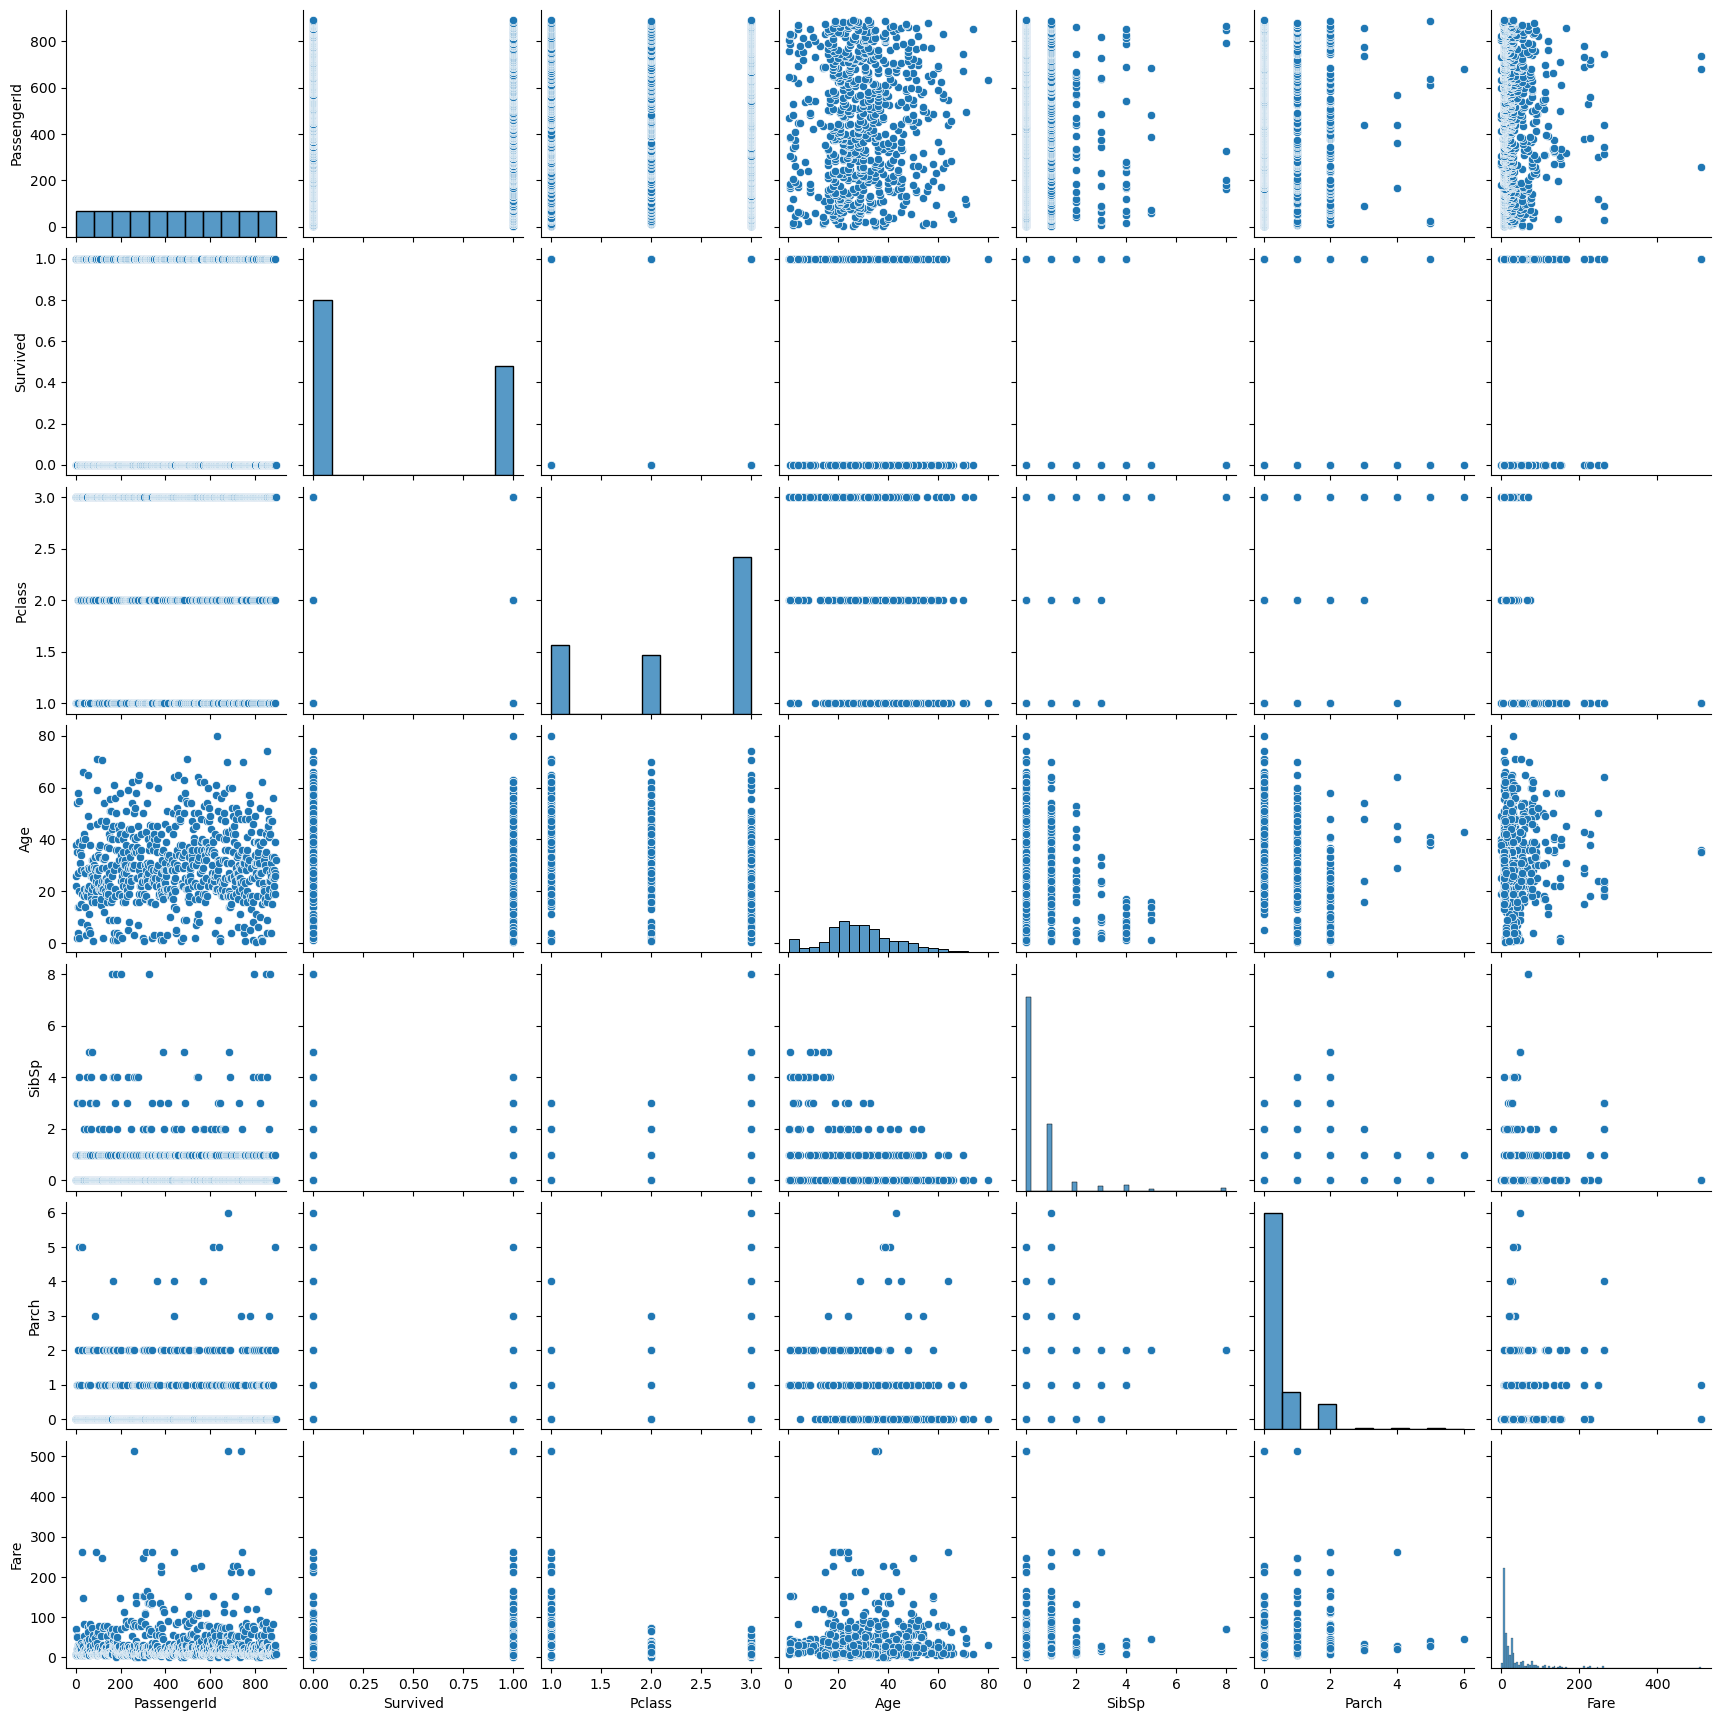

In [16]:
sns.pairplot(dato)
plt.show()

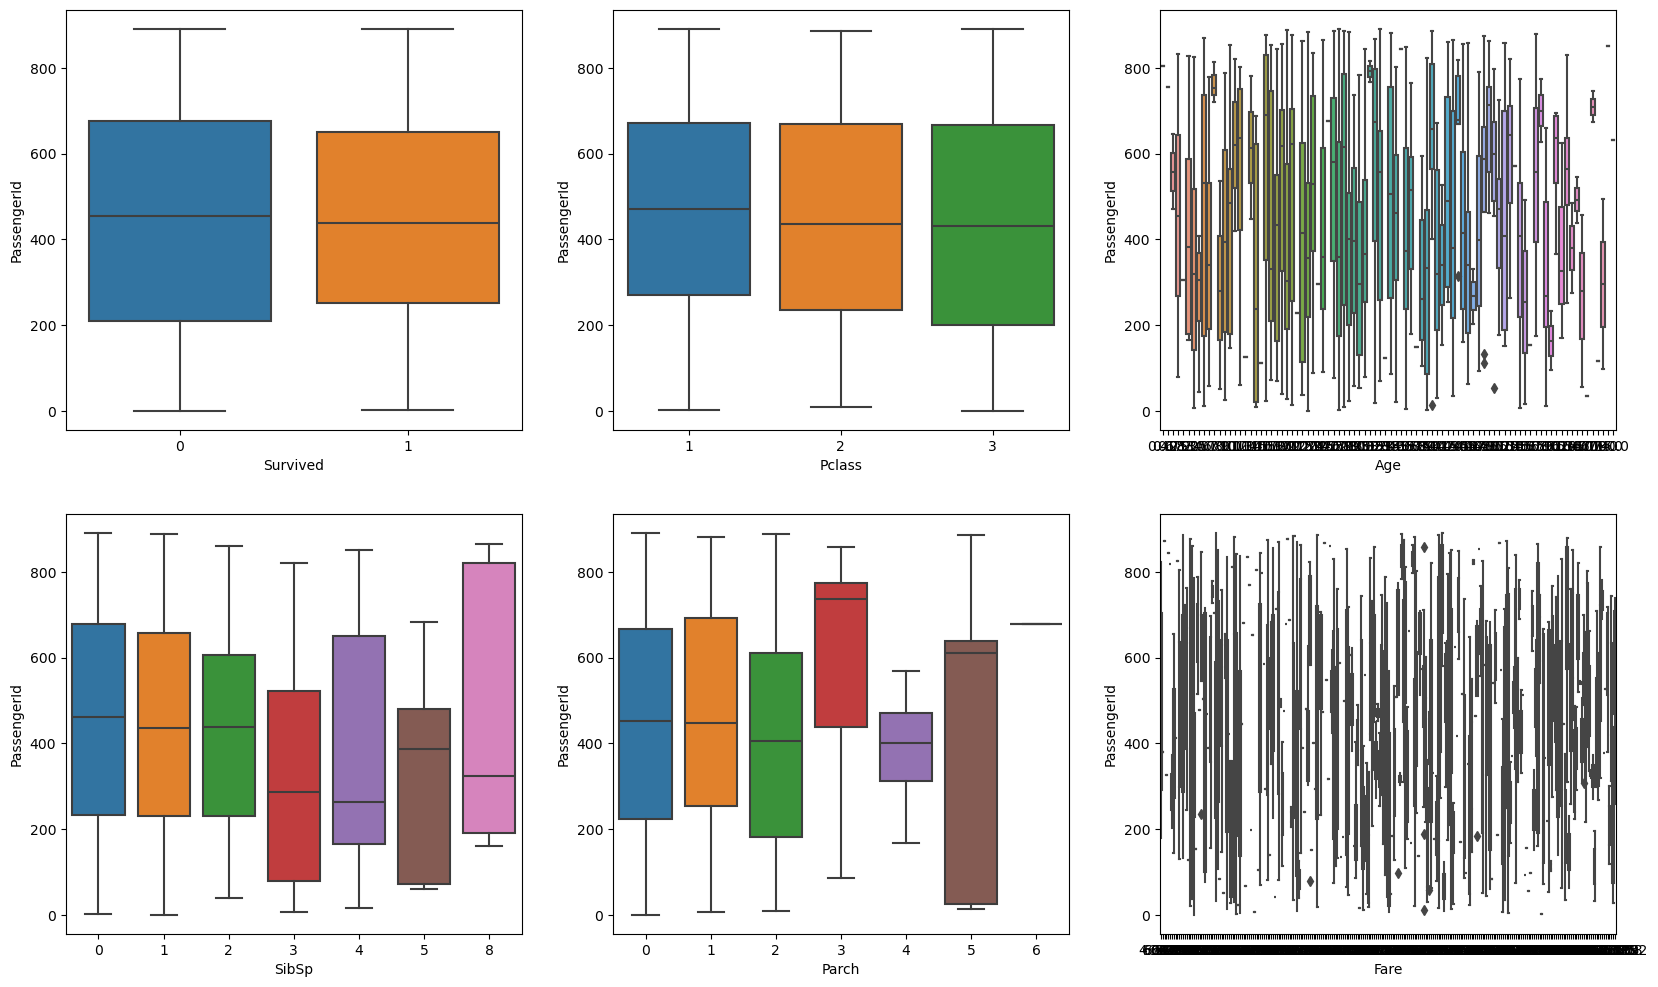

In [17]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Survived', y = 'PassengerId', data = dato)
plt.subplot(2,3,2)
sns.boxplot(x = 'Pclass', y = 'PassengerId', data = dato)
plt.subplot(2,3,3)
sns.boxplot(x = 'Age', y = 'PassengerId', data = dato)
plt.subplot(2,3,4)
sns.boxplot(x = 'SibSp', y = 'PassengerId', data = dato)
plt.subplot(2,3,5)
sns.boxplot(x = 'Parch', y = 'PassengerId', data = dato)
plt.subplot(2,3,6)
sns.boxplot(x = 'Fare', y = 'PassengerId', data = dato)
plt.show()

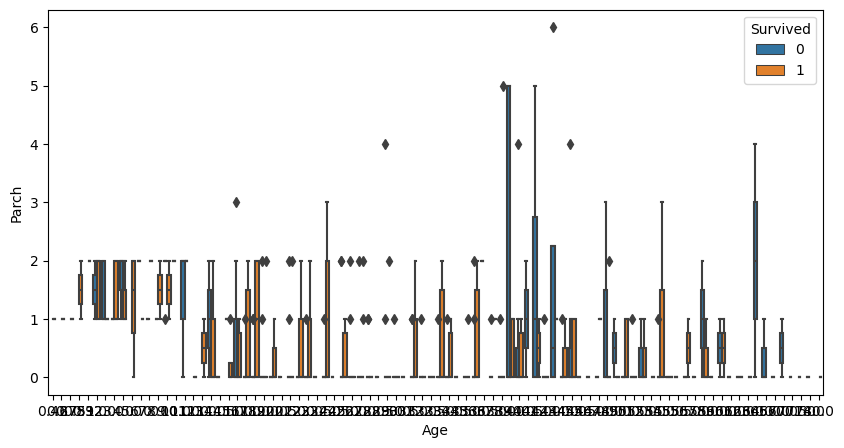

In [21]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'Age', y = 'Parch', hue = 'Survived', data = dato)
plt.show()

In [24]:
var_1 =  ['Sex']

def binary_map(x):
    return x.map({"male": 1, "female": 0})
dato[var_1] = dato[var_1].apply(binary_map)

In [25]:
dato.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,NaN,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,NaN,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,NaN,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,NaN,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,NaN,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [26]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(dato, train_size = 0.7, test_size = 0.3, random_state = 100)

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
num_vars = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp','Parch']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [30]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
69,0.077528,NaN,1.0,"Kink, Mr. Vincenz",1.0,0.347649,0.250,0.0,315151,8.6625,NaN,S
85,0.095506,NaN,1.0,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",0.0,0.442783,0.375,0.0,3101278,15.8500,NaN,S
794,0.892135,NaN,1.0,"Dantcheff, Mr. Ristiu",1.0,0.334058,0.000,0.0,349203,7.8958,NaN,S
161,0.180899,NaN,0.5,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",0.0,0.537918,0.000,0.0,C.A. 33595,15.7500,NaN,S
815,0.915730,NaN,0.0,"Fry, Mr. Richard",1.0,NaN,0.000,0.0,112058,0.0000,B102,S


In [31]:
df_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,623.000000,0.0,623.000000,623.000000,495.000000,623.000000,623.000000,623.000000
mean,0.507708,NaN,0.645265,0.646870,0.402856,0.067817,0.074157,32.798434
std,0.292254,NaN,0.420732,0.478327,0.195742,0.140393,0.160255,52.230584
min,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.265730,NaN,0.250000,0.000000,0.279696,0.000000,0.000000,7.895800
50%,0.512360,NaN,1.000000,1.000000,0.381625,0.000000,0.000000,14.454200
75%,0.764045,NaN,1.000000,1.000000,0.524327,0.125000,0.000000,31.275000
max,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,512.329200


In [32]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

ValueError: could not convert string to float: 'Kink, Mr. Vincenz'

<Figure size 1600x1000 with 0 Axes>